In [1]:
import pandas as pd
from signalai.config import CONFIG_DIR, PIPELINE_SAVE_PATH
from taskorganizer.pipeline import Pipeline
from signalai.signal_tools.signal import SignalDataset, Signal

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

In [2]:
config_path = CONFIG_DIR / "processing" / "pipeline.yaml"
params_config_path = CONFIG_DIR / "data_preparation" / "diamond_noise.yaml"
generator_config_path = CONFIG_DIR / "generators" / "diamond_noise.yaml"
pip = Pipeline(
    config_path,
    config_dir=CONFIG_DIR,
    save_folder=PIPELINE_SAVE_PATH,
    parameter_yamls=[params_config_path, generator_config_path]
)

In [3]:
df = pip.run("DatasetLoader")

processing dataset: diamond_loc00
processing dataset: diamond_loc01
processing dataset: diamond_loc02
processing dataset: diamond_loc03
processing dataset: diamond_loc04
processing dataset: diamond_loc05
processing dataset: diamond_loc06
processing dataset: diamond_loc07
processing dataset: diamond_loc08
processing dataset: diamond_loc09
processing dataset: noise


In [4]:
gen = pip.run("data_generator")

track t0 initialized with datasets ["diamond_loc00", "diamond_loc01", "diamond_loc02", "diamond_loc03", "diamond_loc04", "diamond_loc05", "diamond_loc06", "diamond_loc07", "diamond_loc08", "diamond_loc09"]
track t1 initialized with datasets ["noise"]


In [5]:
X, Y = next(gen)

Sample taken from 0 to 100000, channel 0
Sample taken from 0 to 100000, channel 1
Sample taken from 0 to 100000, channel 2
Sample taken from 0 to 100000, channel 3
Sample taken from 67843354 to 67943354, channel 0
Sample taken from 67843354 to 67943354, channel 1
Sample taken from 67843354 to 67943354, channel 2
Sample taken from 67843354 to 67943354, channel 3


In [6]:
s = Signal(X)

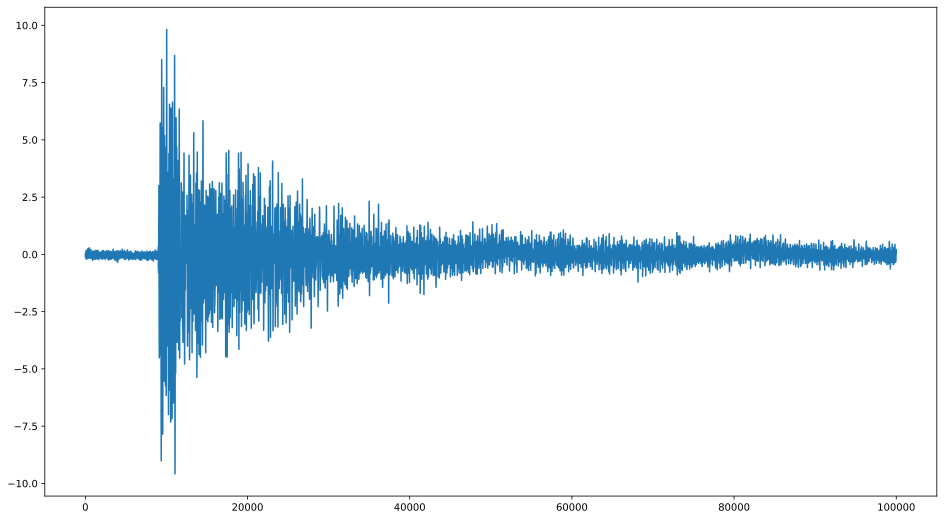

In [7]:
s.show(channels=0)

In [16]:
s.play()

In [9]:
s.signal

array([[-9.4018519e-02,  4.9288794e-03, -8.4107080e-03, ...,
         2.5192809e-01,  7.4055448e-02,  2.5425470e-01],
       [ 4.3141598e-01,  3.2968161e-01, -5.0482497e-02, ...,
         1.3905531e-01, -7.4576512e-02,  2.1198386e-01],
       [-7.3947990e-03, -8.1716567e-02, -1.4158359e-01, ...,
        -4.0053353e-02, -4.0053353e-02,  4.2500719e-04],
       [-1.8762644e-01, -2.2358093e-01, -1.5891716e-01, ...,
        -3.4244782e-01, -4.9726915e-01, -3.1665701e-01]], dtype=float32)

In [12]:
len(s)

100000

In [14]:
s.signal_map

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

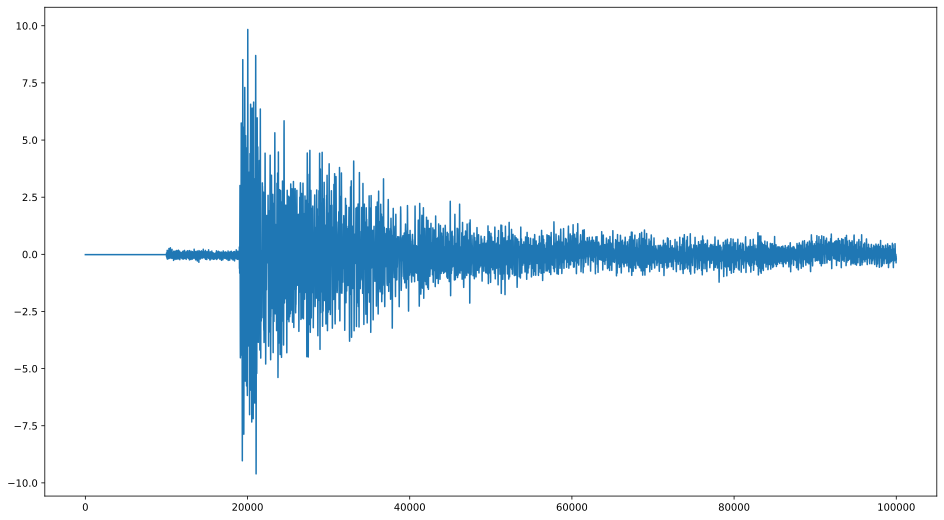

In [15]:
s.margin_interval(100000, 10000).show(channels=0)